# Линейная регрессия

Необходимо реализовать модель линейной регрессии, которая моделирует поведение функции синуса на основе исходных данных

## Подключение библиотек

In [171]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Работа с данными

In [172]:
objects_count = 1000
x_original = np.linspace(-2 * np.pi, 2 * np.pi, objects_count)
y_original = np.sin(x_original)

x_original = x_original.reshape(-1, 1)

x_train, x_test, y_train, y_test = [], [], [], []
for i in range(int(objects_count*0.7)):
    x_train.append(x_original[i])
    y_train.append(y_original[i])

for i in range(int(objects_count*0.7), objects_count):
    x_test.append(x_original[i])
    y_test.append(y_original[i])

x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Визуализация данных

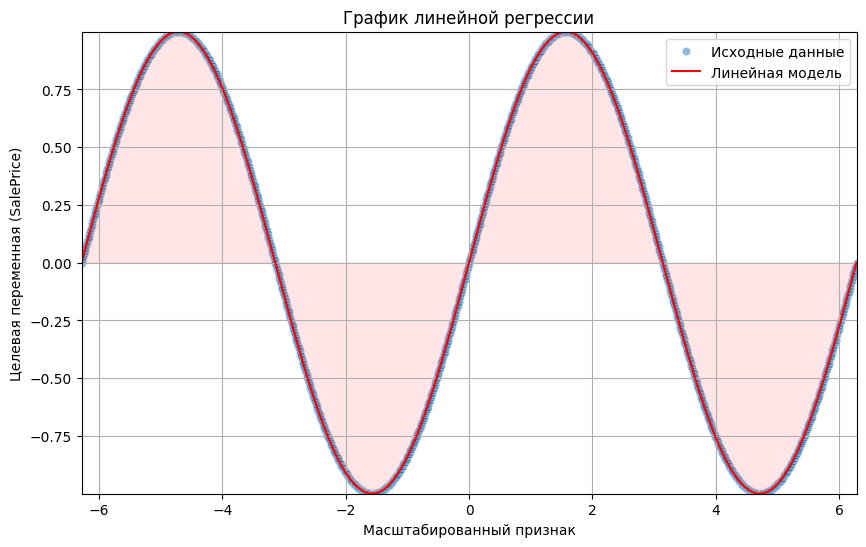

In [173]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_original.ravel(), y=y_original.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(min(x_original), max(x_original), 500).reshape(-1, 1) 
y_range = np.sin(x_range)

plt.plot(x_range.ravel(), y_range.ravel(), color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range.ravel(), color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(min(x_original), max(x_original))
plt.ylim(min(y_original), max(y_original))
plt.show()

## 2. Модель 

### Создаем модель

In [174]:
class LinearRegression:
  def __init__(self, lr=0.001, eps=1e-8, iterations=10**10, degree=1):
    self.lr = lr
    self.iterations = iterations
    self.eps = eps
    self.degree = degree
    self.weights = None    
    self.mseHistory = []
    
  def addIntercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
  def addPolynomialFeatures(self, X):
    if self.degree <= 1:
      return X  
    poly_features = [X ** i for i in range(1, self.degree + 1)]
    return np.hstack(poly_features)
  
  
  def train(self, X, Y):
    self.mseHistory.clear()
    X = self.addPolynomialFeatures(X)
    X = self.addIntercept(X)
    self.weights = np.zeros(X.shape[1])
    for i in range(0, self.iterations):
      y_pred = X @ self.weights
      error = y_pred - Y
      grad = (2 / X.shape[0]) * X.T @ error
      self.weights -= self.lr * grad
      mse = np.mean(error ** 2)
      self.mseHistory.append(mse)
      if i > 0 and abs(self.mseHistory[i] - self.mseHistory[i-1]) < self.eps:
        print(f"Остановка на итерации {i} из-за маленького изменения MSE.")
        break
        
  def predict(self, X):
    X = self.addPolynomialFeatures(X)
    X = self.addIntercept(X)
    return X @ self.weights
  
  def getWeights(self):
    return self.weights 
    
  def getErrorHistory(self):
    return self.mseHistory

### Тренировка

Остановка на итерации 14461 из-за маленького изменения MSE.


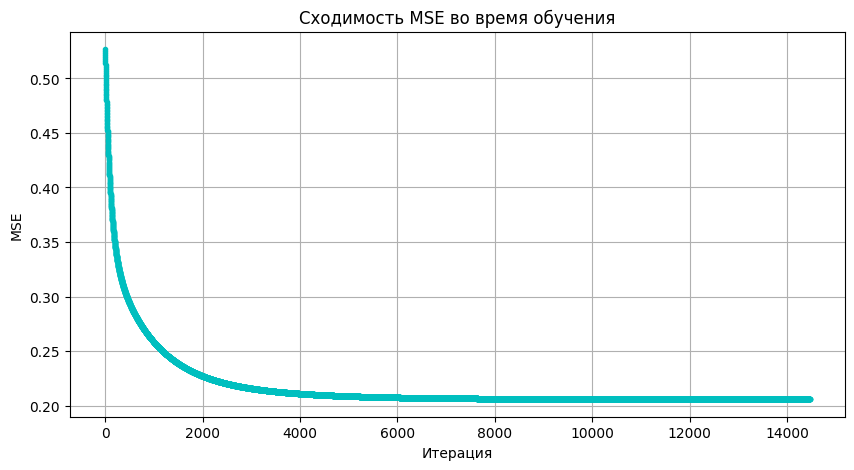

In [175]:
model = LinearRegression(degree=3)
model.train(x_train, y_train)

mseHistory = model.getErrorHistory()
plt.figure(figsize=(10, 5))
plt.plot(mseHistory, marker='.', linestyle=':', color='c')
plt.title('Сходимость MSE во время обучения')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Оценка качества модели на тренировочных данных

#### Функционал качества

In [176]:
y_pred = model.predict(x_train)
mse = model.getErrorHistory()[-1]
print(f"MSE: {mse:.5f}")

MSE: 0.20590


#### Визуализация модели

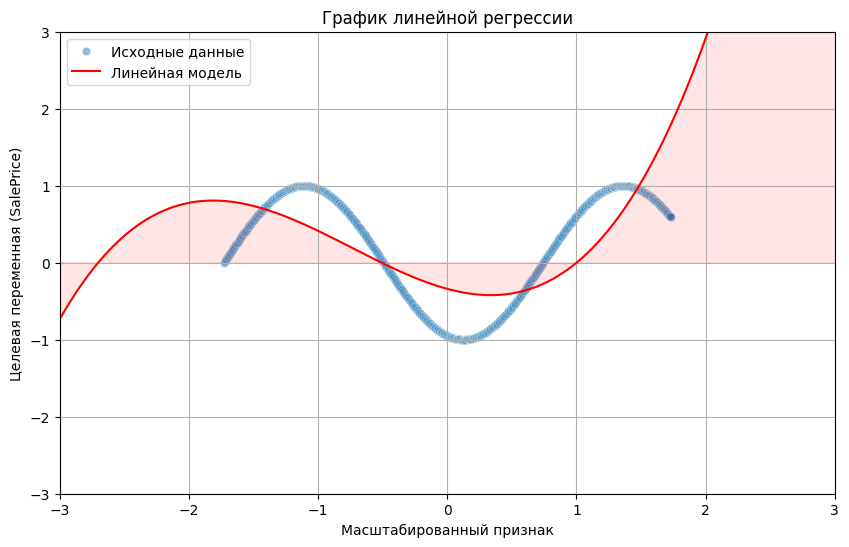

In [177]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_train.ravel(), y=y_train.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(-5, 5, 500).reshape(-1, 1) 
y_range = model.predict(x_range)
plt.plot(x_range.ravel(), y_range, color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range, color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### Оценка качества модели на тестовых данных

#### Функционал качества

In [178]:
y_pred = model.predict(x_test)
mse = model.getErrorHistory()[-1]
print(f"MSE: {mse:.5f}")

MSE: 0.20590


#### Визуализация модели

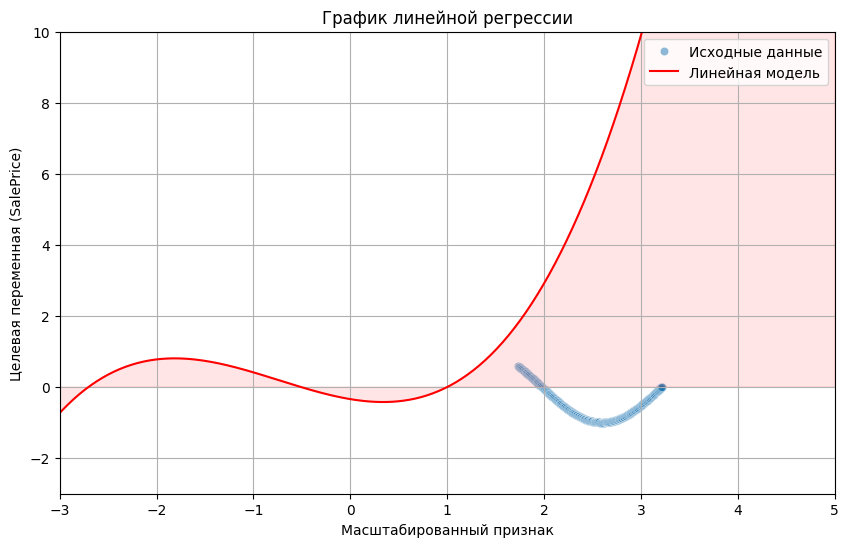

In [179]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_test.ravel(), y=y_test.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(-5, 5, 500).reshape(-1, 1) 
y_range = model.predict(x_range)
plt.plot(x_range.ravel(), y_range, color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range, color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(-3, 5)
plt.ylim(-3, 10)
plt.show()

## Сравнение эффективности

Остановка на итерации 2433 из-за маленького изменения MSE.
Degree: 1, Train MSE: 0.48421, Test MSE: 0.16284
Остановка на итерации 7414 из-за маленького изменения MSE.
Degree: 2, Train MSE: 0.24521, Test MSE: 0.16510
Degree: 3, Train MSE: 0.20608, Test MSE: 0.13477
Degree: 4, Train MSE: 0.05318, Test MSE: nan


c:\Projects\University\NeuralNetworks\venv\Lib\site-packages\numpy\_core\_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp\ipykernel_25116\1064884865.py:31: RuntimeWarning: overflow encountered in square
  mse = np.mean(error ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_25116\1064884865.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(self.mseHistory[i] - self.mseHistory[i-1]) < self.eps:
C:\Users\User\AppData\Local\Temp\ipykernel_25116\1064884865.py:29: RuntimeWarning: overflow encountered in matmul
  grad = (2 / X.shape[0]) * X.T @ error
C:\Users\User\AppData\Local\Temp\ipykernel_25116\1064884865.py:30: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * grad


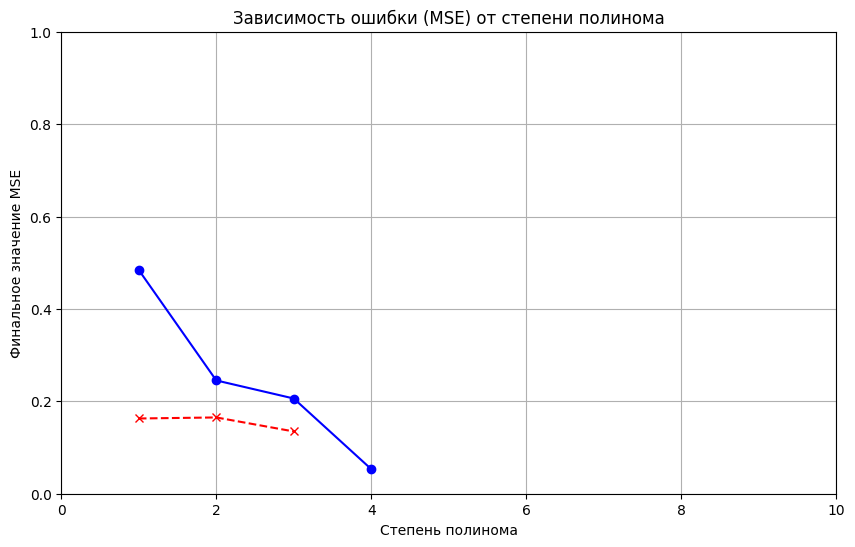

In [180]:
plt.figure(figsize=(10, 6))

max_degree = 4
degrees = []
mse_values_train = []
mse_values_test = []

for degree in range(1, max_degree + 1):
    model_train = LinearRegression(lr=0.001, eps=1e-8, iterations=10000, degree=degree)
    model_train.train(x_train, y_train)
    
    model_test = LinearRegression(lr=0.001, eps=1e-8, iterations=10000, degree=degree)
    model_test.train(x_test, y_test)
    
    degrees.append(degree)
    mse_values_train.append(model_train.getErrorHistory()[-1])  
    mse_values_test.append(model_test.getErrorHistory()[-1])
    
    print(f"Degree: {degree}, Train MSE: {model_train.getErrorHistory()[-1]:.5f}, Test MSE: {model_test.getErrorHistory()[-1]:.5f}")

plt.plot(degrees, mse_values_train, marker='o', linestyle='-', color='b')
plt.plot(degrees, mse_values_test, marker='x', linestyle='--', color='r')
plt.title("Зависимость ошибки (MSE) от степени полинома")
plt.xlabel("Степень полинома")
plt.ylabel("Финальное значение MSE")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.grid(True)
plt.show()